# Weather Forecasting

### Weather forecasting can be either classification or regression, depending on what we are predicting:

#### Regression (when predicting continuous values):
##### Temperature: Predicting the exact temperature (e.g., 25°C).
##### Humidity: Predicting the percentage of humidity (e.g., 70%).
##### Wind speed: Predicting wind speed (e.g., 15 km/h).
### In these cases, I'm trying to predict a specific numeric value of temperature, so it's a regression problem.

#### Classification (when predicting categories or labels):
##### Weather condition: Predicting whether the weather will be sunny, rainy, cloudy, etc.
##### Storm warning: Predicting whether there will be a storm or not (yes/no).

## About data set features

#### maxtempC: The highest temperature recorded for the day (in Celsius).
#### mintempC: The lowest temperature recorded for the day (in Celsius).
#### totalSnow_cm: The amount of snow that fell (in centimeters).
#### sunHour: The total number of hours the sun was shining.
#### uvIndex: A number that shows the strength of the sun's UV rays.
#### uvIndex.1: A second UV index, possibly a duplicate or from a different source.
#### moon_illumination: How much of the moon is visible (as a percentage).
#### moonrise: The time when the moon rises.
#### moonset: The time when the moon sets.
#### sunrise: The time when the sun rises.
#### sunset: The time when the sun sets.
#### DewPointC: The temperature at which dew forms (in Celsius).
#### FeelsLikeC: How the temperature feels to people (in Celsius), considering wind and humidity.
#### HeatIndexC: A measure of how hot it feels when humidity is taken into account (in Celsius).
#### WindChillC: How cold it feels due to the wind (in Celsius).
#### WindGustKmph: The highest speed of wind gusts recorded (in kilometers per hour).
#### cloudcover: The percentage of the sky covered by clouds.
#### humidity: The amount of moisture in the air (as a percentage).
#### precipMM: The amount of rain or precipitation (in millimeters).
#### pressure: The atmospheric pressure, often linked to weather changes.
#### tempC: The current temperature (in Celsius).
#### visibility: How far you can see, usually in kilometers.
#### winddirDegree: The direction the wind is blowing from (in degrees).
#### windspeedKmph: The speed of the wind (in kilometers per hour).

In [276]:
# Importing libraries for loading data_set and data manupulations
import numpy as np
import pandas as pd

In [353]:
# Load the weather data from 'forecast.csv' and use 'date_time' as the row labels (index)
# Also, convert the 'date_time' column into actual date and time format
dfff=pd.read_csv('forecast.csv',parse_dates=['date_time'], index_col='date_time')

In [354]:
# First 5 rows of data_set
dfff.head()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2009-01-01 00:00:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,6:57 AM,...,11,21,17,50,0.0,1015,11,10,320,10
2009-01-01 01:00:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,6:57 AM,...,12,22,11,52,0.0,1015,11,10,315,11
2009-01-01 02:00:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,6:57 AM,...,12,23,6,55,0.0,1015,11,10,310,11
2009-01-01 03:00:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,6:57 AM,...,12,23,0,57,0.0,1015,10,10,304,12
2009-01-01 04:00:00,24,10,0,8.7,4,1,31,9:56 AM,9:45 PM,6:57 AM,...,14,19,0,54,0.0,1016,11,10,302,11


In [355]:
# last five rows of data_set
dfff.tail()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,moonrise,moonset,sunrise,...,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,,,,
2012-10-21 18:00:00,33,19,0,8.7,7,6,38,11:59 AM,11:09 PM,6:11 AM,...,27,17,3,34,0.0,1013,25,10,11,8
2012-10-21 19:00:00,33,19,0,8.7,7,1,38,11:59 AM,11:09 PM,6:11 AM,...,26,16,2,36,0.0,1013,24,10,15,8
2012-10-21 20:00:00,33,19,0,8.7,7,1,38,11:59 AM,11:09 PM,6:11 AM,...,26,14,2,37,0.0,1014,24,10,19,7
2012-10-21 21:00:00,33,19,0,8.7,7,1,38,11:59 AM,11:09 PM,6:11 AM,...,26,13,2,38,0.0,1014,23,10,24,7
2012-10-21 22:00:00,33,19,0,8.7,7,1,38,11:59 AM,11:09 PM,6:11 AM,...,26,13,2,39,0.0,1013,22,10,23,7


In [357]:
# Number of rows and columns of forecast_data_set
dfff.shape

(33359, 24)

In [358]:
# features or columns names of forecast_data_set
dfff.columns

Index(['maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex',
       'uvIndex.1', 'moon_illumination', 'moonrise', 'moonset', 'sunrise',
       'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC',
       'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure',
       'tempC', 'visibility', 'winddirDegree', 'windspeedKmph'],
      dtype='object')

In [359]:
# statistical measurements of data_set
dfff.describe()

,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,uvIndex.1,moon_illumination,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
count,33359.000000,33359.000000,33359.0,33359.000000,33359.000000,33359.000000,33359.000000,33359.000000,33359.000000,33359.000000,33359.000000,33359.000000,33359.000000,33359.000000,33359.000000,33359.000000,33359.000000,33359.000000,33359.000000,33359.000000
mean,33.628796,21.600797,0.0,11.197053,6.765461,4.462394,46.066429,14.014059,30.956803,31.115501,28.984862,13.719986,16.571270,48.087623,0.040526,1005.352858,27.091250,9.726311,204.741209,9.106178
std,7.195360,7.650645,0.0,2.103935,1.543550,3.422638,31.222806,8.356742,9.706591,9.538795,8.292196,6.544519,23.517185,25.178448,0.337532,7.411988,8.665954,1.217087,105.216666,4.351348
min,16.000000,3.000000,0.0,4.300000,3.000000,1.000000,0.000000,-14.000000,5.000000,8.000000,5.000000,0.000000,0.000000,2.000000,0.000000,988.000000,3.000000,0.000000,0.000000,0.000000
25%,28.000000,15.000000,0.0,8.700000,6.000000,1.000000,18.000000,7.000000,24.000000,25.000000,24.000000,9.000000,0.000000,27.000000,0.000000,999.000000,21.000000,10.000000,100.000000,6.000000
50%,33.000000,23.000000,0.0,11.600000,7.000000,5.000000,45.000000,13.000000,32.000000,32.000000,29.000000,13.000000,5.000000,47.000000,0.000000,1005.000000,28.000000,10.000000,241.000000,9.000000
75%,39.000000,27.000000,0.0,13.100000,8.000000,8.000000,73.000000,23.000000,38.000000,38.000000,34.000000,18.000000,26.000000,68.000000,0.000000,1012.000000,33.000000,10.000000,298.000000,12.000000
max,49.000000,36.000000,0.0,13.900000,10.000000,11.000000,100.000000,31.000000,65.000000,65.000000,54.000000,75.000000,100.000000,100.000000,13.300000,1024.000000,49.000000,10.000000,360.000000,32.000000


In [360]:
# Checking for null values in data_set
dfff.isnull().sum()

maxtempC             0
mintempC             0
totalSnow_cm         0
sunHour              0
uvIndex              0
uvIndex.1            0
moon_illumination    0
moonrise             0
moonset              0
sunrise              0
sunset               0
DewPointC            0
FeelsLikeC           0
HeatIndexC           0
WindChillC           0
WindGustKmph         0
cloudcover           0
humidity             0
precipMM             0
pressure             0
tempC                0
visibility           0
winddirDegree        0
windspeedKmph        0
dtype: int64

# Visualization of all the column values

In [284]:
# import visualization and plotting library
import matplotlib.pyplot as plt

<Axes: xlabel='date_time'>

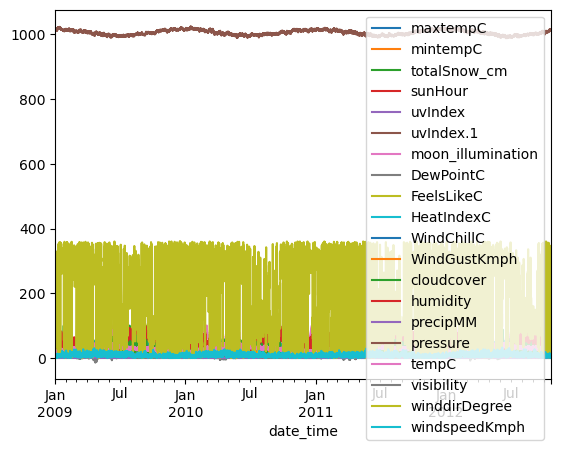

In [361]:
# plotting column values without using any paramenters
dfff.plot()

array([<Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>,
       <Axes: xlabel='date_time'>, <Axes: xlabel='date_time'>],
      dtype=object)

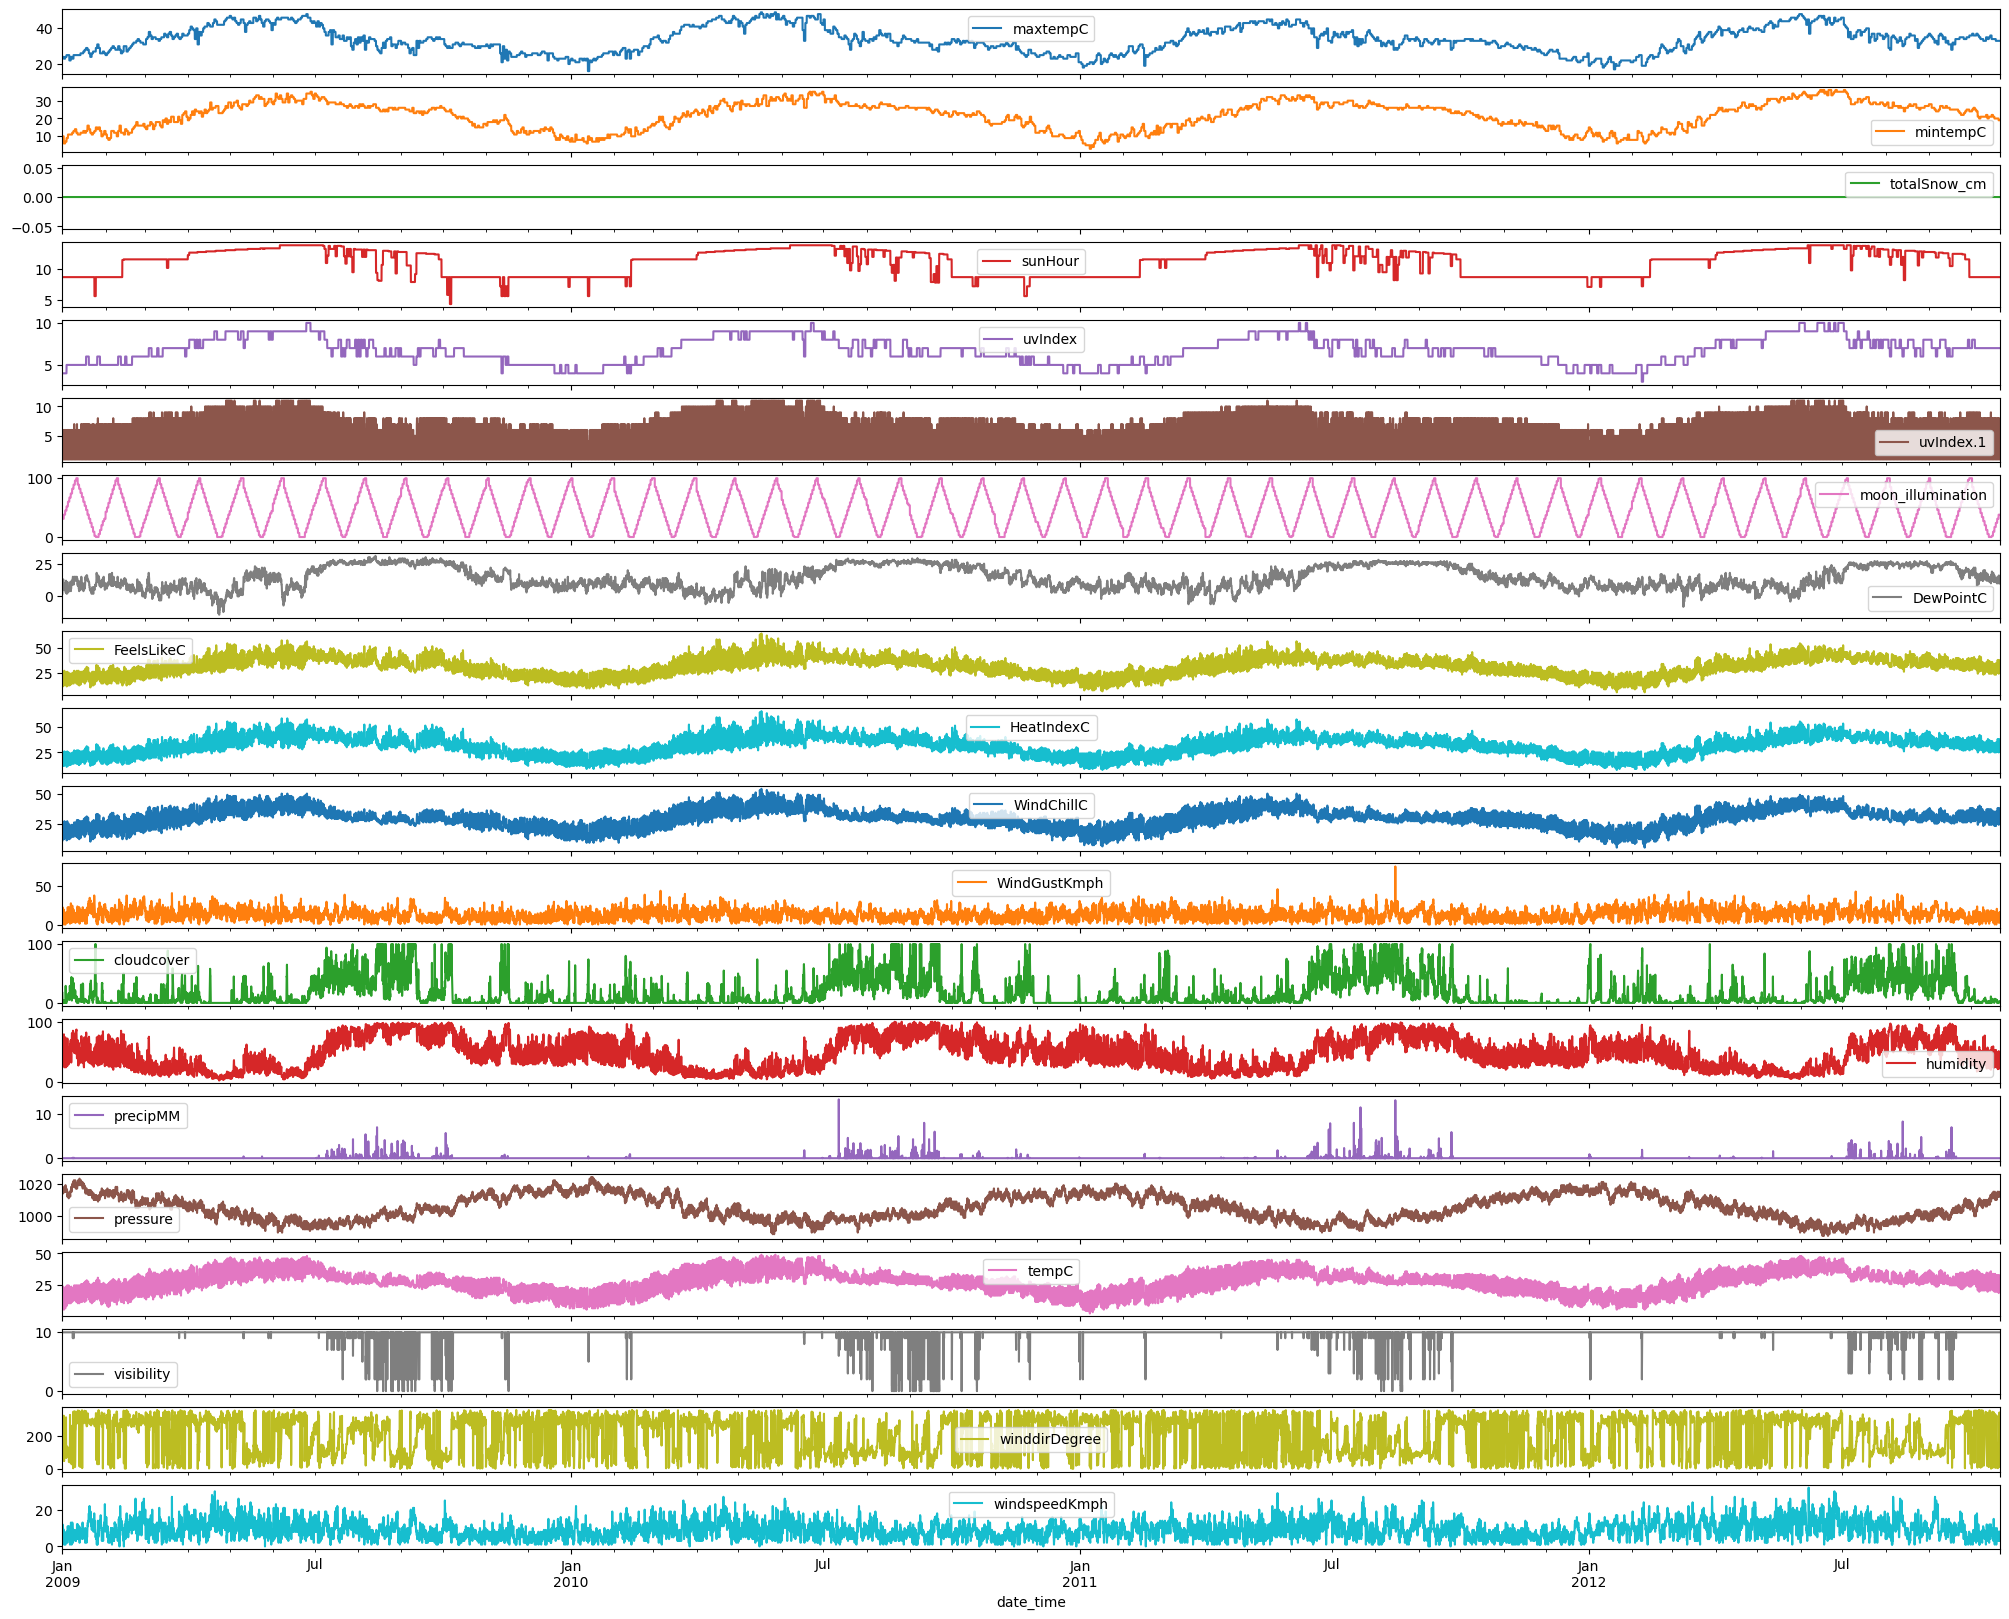

In [362]:
# without any parameters data visualization is some difficult to understand
# let us use some plot parameters i.e subplots and figsize to understand clearly
dfff.plot(subplots=True, figsize=(25,20))

In [363]:
#Based on the above visualizations and 'moonrise','moonset','sunrise','sunset' have string values we can't convert 
#into numerical values and those values are not suitable for feeding for model 
#totalSnow_cm','moon_illumination have constant values so those values doesn't effect on my target value
#dropping these columns
dfff.drop(['totalSnow_cm','moon_illumination','moonrise','moonset','sunrise','sunset'],axis=1,inplace=True)

In [364]:
#mintempc value counts
dfff['mintempC'].value_counts()

mintempC
26    3192
27    2160
28    1824
25    1800
29    1416
31    1392
24    1368
12    1344
11    1272
17    1200
21    1080
16    1080
23    1056
22    1056
18    1032
10    1008
13     960
30     936
15     888
33     840
9      840
20     816
8      816
19     791
32     768
14     696
34     432
7      432
35     384
6      192
36     144
5       96
3       24
4       24
Name: count, dtype: int64

array([[<Axes: title={'center': 'maxtempC'}>,
        <Axes: title={'center': 'mintempC'}>,
        <Axes: title={'center': 'sunHour'}>,
        <Axes: title={'center': 'uvIndex'}>],
       [<Axes: title={'center': 'uvIndex.1'}>,
        <Axes: title={'center': 'DewPointC'}>,
        <Axes: title={'center': 'FeelsLikeC'}>,
        <Axes: title={'center': 'HeatIndexC'}>],
       [<Axes: title={'center': 'WindChillC'}>,
        <Axes: title={'center': 'WindGustKmph'}>,
        <Axes: title={'center': 'cloudcover'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'precipMM'}>,
        <Axes: title={'center': 'pressure'}>,
        <Axes: title={'center': 'tempC'}>,
        <Axes: title={'center': 'visibility'}>],
       [<Axes: title={'center': 'winddirDegree'}>,
        <Axes: title={'center': 'windspeedKmph'}>, <Axes: >, <Axes: >]],
      dtype=object)

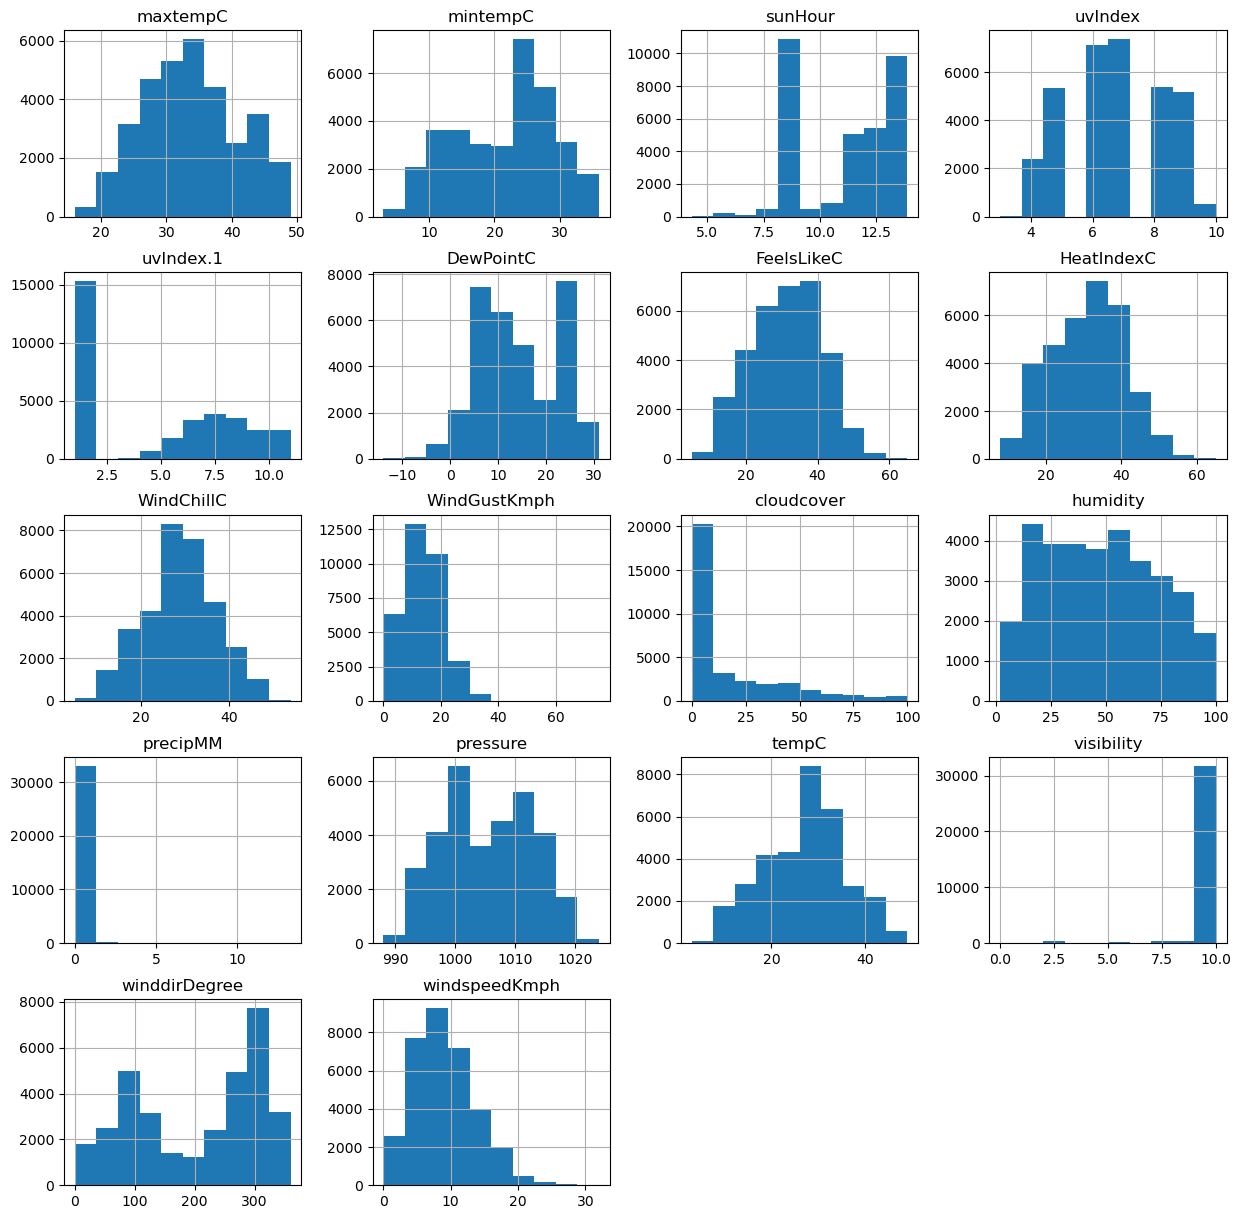

In [365]:
#visualizing histograms for each numerical column in dataset
#bins specifies the number of intervals for the histogram
#figsize sets the size of the entire figure to 15 inches by 15 inches
dfff.hist(bins=10,figsize=(15,15))

In [366]:
# storing one year weather data
oneyear_data=dfff['2010':'2011']

In [290]:
# checking five rows of oneyear weathe data
oneyear_data.head()

,maxtempC,mintempC,sunHour,uvIndex,uvIndex.1,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph
date_time,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,23,9,8.7,4,1,8,13,13,13,19,0,68,0.0,1014,10,10,266,10
2010-01-01 01:00:00,23,9,8.7,4,1,7,12,13,12,18,0,68,0.0,1014,9,10,265,10
2010-01-01 02:00:00,23,9,8.7,4,1,7,12,13,12,18,0,68,0.0,1014,9,10,263,9
2010-01-01 03:00:00,23,9,8.7,4,1,7,12,12,12,17,0,69,0.0,1015,9,10,262,9
2010-01-01 04:00:00,23,9,8.7,4,1,7,13,14,13,16,0,64,0.0,1016,10,10,256,10


# Divide the data_set 

In [367]:
# Divide the data_set in to x and y
# x is stored all the input features i.e input column values 
x=dfff.drop(['tempC'],axis=1)

In [368]:
# check the x data_set
x,x.shape

(                     maxtempC  mintempC  sunHour  uvIndex  uvIndex.1  \
 date_time                                                              
 2009-01-01 00:00:00        24        10      8.7        4          1   
 2009-01-01 01:00:00        24        10      8.7        4          1   
 2009-01-01 02:00:00        24        10      8.7        4          1   
 2009-01-01 03:00:00        24        10      8.7        4          1   
 2009-01-01 04:00:00        24        10      8.7        4          1   
 ...                       ...       ...      ...      ...        ...   
 2012-10-21 18:00:00        33        19      8.7        7          6   
 2012-10-21 19:00:00        33        19      8.7        7          1   
 2012-10-21 20:00:00        33        19      8.7        7          1   
 2012-10-21 21:00:00        33        19      8.7        7          1   
 2012-10-21 22:00:00        33        19      8.7        7          1   
 
                      DewPointC  FeelsLikeC  Heat

In [370]:
# y is stored target column i.e output column values
y=dfff['tempC']

In [371]:
# check the target column 
y,y.shape

(date_time
 2009-01-01 00:00:00    11
 2009-01-01 01:00:00    11
 2009-01-01 02:00:00    11
 2009-01-01 03:00:00    10
 2009-01-01 04:00:00    11
                        ..
 2012-10-21 18:00:00    25
 2012-10-21 19:00:00    24
 2012-10-21 20:00:00    24
 2012-10-21 21:00:00    23
 2012-10-21 22:00:00    22
 Name: tempC, Length: 33359, dtype: int64,
 (33359,))

# Split the Dataset for training and testing

In [372]:
# import libraries for splitting the data
from sklearn.model_selection import train_test_split

In [373]:
# split the data_set into xtrain ,xtest and ytrain ,ytest
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=22)

In [374]:
# checking trained and tested data with orignal x and y data_set
xtrain.shape,xtest.shape , x.shape  , ytrain.shape,ytest.shape , y.shape

((26687, 17), (6672, 17), (33359, 17), (26687,), (6672,), (33359,))

# Types of Regression Algorithms

#### 1.Linear Regression
#### 2.Decision Tree Regression
#### 3.Random Forest Regression
#### 4.KNN Regression
#### 5.SVM Regression
### Linear Regression

In [375]:
# importing linear regression 
from sklearn.linear_model import LinearRegression

In [376]:
#initializing the LinearRegression
linear=LinearRegression()

In [377]:
#train the model
linear.fit(xtrain,ytrain)

LinearRegression()

In [378]:
#predicting the testing data
prediction = linear.predict(xtest)

In [379]:
#comparing the actual test data and predicted test data
result = pd.DataFrame(np.c_[ytest,prediction,ytest-prediction], columns = ["Actual tempC","Predict tempC","diff"])

In [380]:
#printing the result
result

,Actual tempC,Predict tempC,diff
0,16.0,16.846894,-0.846894
1,19.0,19.385582,-0.385582
2,31.0,31.503407,-0.503407
3,22.0,22.209417,-0.209417
4,34.0,34.122215,-0.122215
...,...,...,...
6667,27.0,27.858034,-0.858034
6668,27.0,25.769776,1.230224
6669,24.0,24.549309,-0.549309
6670,34.0,33.566683,0.433317


##### Model Evaluation

In [381]:
#importing model evaluation metrics
from sklearn.metrics import mean_squared_error,r2_score

In [382]:
#MSE(mean squared error)
#Low MSE means a good model
#high MSE means a bad model
mse=mean_squared_error(ytest,prediction)

In [383]:
#printing mean square error
print(f"mean squared error : {mse}")

mean squared error : 0.9359953826296455


In [384]:
#The R2 score of 1 means it’s a perfect match
r2=r2_score(prediction,ytest)

In [385]:
#printing the r2 score
print(f"r2 score is: {r2}")

r2 score is: 0.9875904543428213


### plotting for finding relation between max temperature and temperature

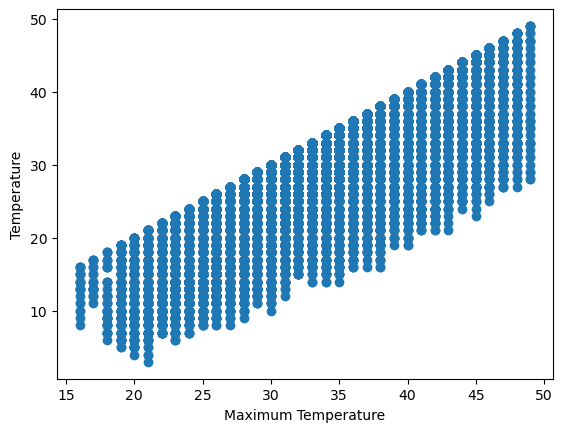

In [386]:
plt.scatter(dfff.maxtempC,dfff.tempC)
plt.xlabel("Maximum Temperature")
plt.ylabel("Temperature")
plt.show()

### plotting for finding relation between min temperature and temperature

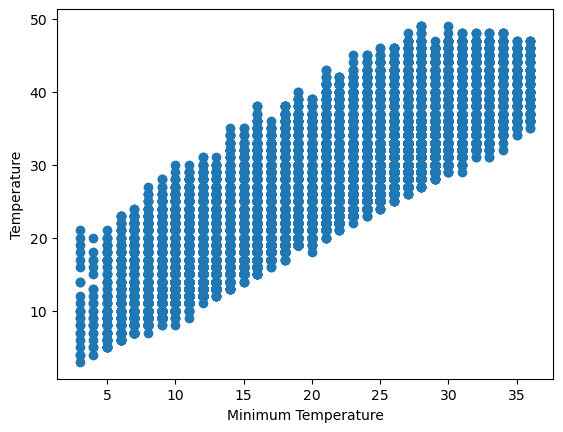

In [387]:
plt.scatter(dfff.mintempC,dfff.tempC)
plt.xlabel("Minimum Temperature")
plt.ylabel("Temperature")
plt.show()

### plotting for finding relation between humidity and temperature 

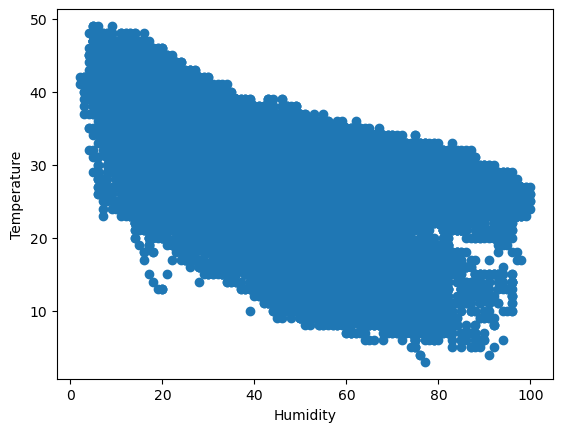

In [388]:
plt.scatter(dfff.humidity,dfff.tempC)
plt.xlabel("Humidity")
plt.ylabel("Temperature")
plt.show()

### plotting for finding relation between pressure and temperature

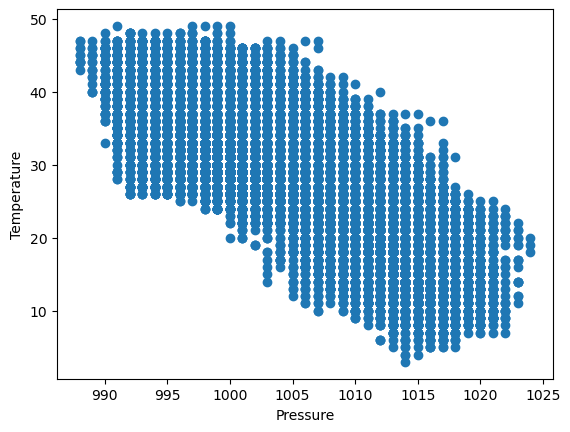

In [389]:
plt.scatter(dfff.pressure,dfff.tempC)
plt.xlabel("Pressure")
plt.ylabel("Temperature")
plt.show()

### plotting for finding relation between sunHour and temperature

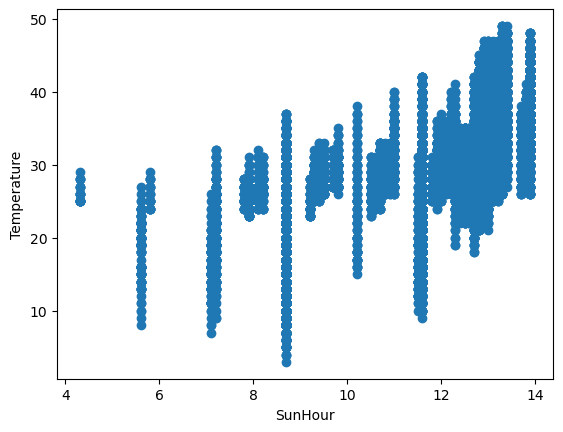

In [390]:
plt.scatter(dfff.sunHour,dfff.tempC)
plt.xlabel("SunHour")
plt.ylabel("Temperature")
plt.show()

### plotting for finding relation between HeatIndexC and temperature

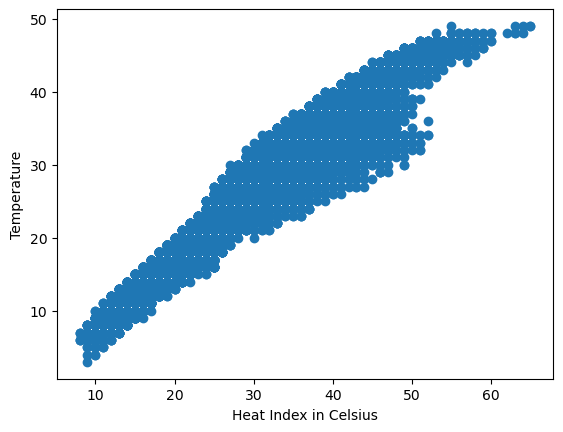

In [391]:
plt.scatter(dfff.HeatIndexC,dfff.tempC)
plt.xlabel("Heat Index in Celsius")
plt.ylabel("Temperature")
plt.show()

### plotting for finding relation between windspeedKmph and temperature 

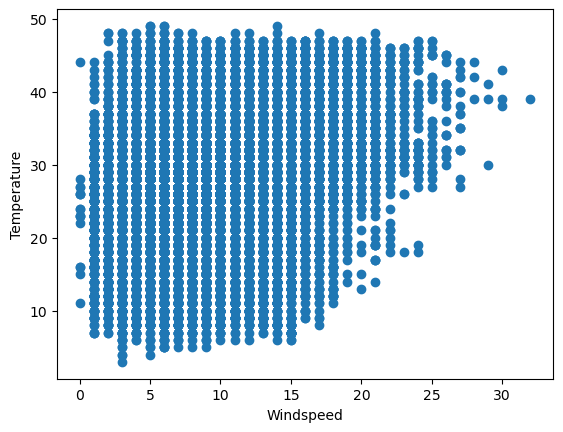

In [392]:
plt.scatter(dfff.windspeedKmph,dfff.tempC)
plt.xlabel("Windspeed")
plt.ylabel("Temperature")
plt.show()

## Decision Tree Regression 

In [393]:
#importing Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [394]:
#initializing the Decision Tree Regression
decision=DecisionTreeRegressor()

In [395]:
#train the model
decision.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [396]:
#predicting the testing data
prediction2=decision.predict(xtest)

In [397]:
#comparing the actual test data and predicted test data
result2 = pd.DataFrame(np.c_[ytest,prediction2,ytest-prediction2], columns = ["Original tempC","Predict tempC","diff"])

In [398]:
#printing result
result2

,Original tempC,Predict tempC,diff
0,16.0,16.0,0.0
1,19.0,18.0,1.0
2,31.0,31.0,0.0
3,22.0,21.0,1.0
4,34.0,33.0,1.0
...,...,...,...
6667,27.0,27.0,0.0
6668,27.0,26.0,1.0
6669,24.0,23.0,1.0
6670,34.0,34.0,0.0


##### Model Evaluation:

In [399]:
#calculating evolution metrics
mse2=mean_squared_error(ytest,prediction2)
r=r2_score(prediction2,ytest)

In [400]:
# Print metrics
print(f"Mean Squared Error (MSE): {mse2}")
print(f"R2 Score: {r}")

Mean Squared Error (MSE): 0.5105290767386091
R2 Score: 0.9933181589978131


### Random Forest Regression:

In [401]:
#importing the Random forest Regressor
from sklearn.ensemble import RandomForestRegressor

In [402]:
#initializing RandomForestRegressor
random_forest=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)

In [403]:
#train the model
random_forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=90, random_state=0)

In [404]:
#predicting the model
prediction3=random_forest.predict(xtest)

In [405]:
#comparing the actual test data and predicted test data
result3 = pd.DataFrame(np.c_[ytest,prediction3,ytest-prediction3], columns = ["Actual tempC","Predict tempC","diff"])

In [406]:
#print
result3

,Actual tempC,Predict tempC,diff
0,16.0,15.93,0.07
1,19.0,18.54,0.46
2,31.0,30.94,0.06
3,22.0,21.85,0.15
4,34.0,33.42,0.58
...,...,...,...
6667,27.0,27.21,-0.21
6668,27.0,26.06,0.94
6669,24.0,24.00,0.00
6670,34.0,33.60,0.40


##### Model evaluation:

In [407]:
#calculating evolution metrics
mse3=mean_squared_error(prediction3,ytest)
random_r2=r2_score(prediction3,ytest)

In [408]:
#printing MSE and r2 score
print(f"Mean Squared Error (MSE): {mse3}")
print(f"R2 Score: {random_r2}")

Mean Squared Error (MSE): 0.2700087281216693
R2 Score: 0.9964580536196977


### KNN Regression

In [409]:
#importing KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

In [410]:
# Create and train the KNN regressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=3)

In [411]:
# Make predictions
y_pred = knn.predict(xtest)

In [412]:
#comparing the actual test data and predicted test data
result_knn = pd.DataFrame(np.c_[ytest,y_pred,ytest-y_pred], columns = ["Actual tempC","Predict tempC","diff"])

In [413]:
result_knn

,Actual tempC,Predict tempC,diff
0,16.0,15.333333,0.666667
1,19.0,19.333333,-0.333333
2,31.0,30.666667,0.333333
3,22.0,22.000000,0.000000
4,34.0,34.666667,-0.666667
...,...,...,...
6667,27.0,28.000000,-1.000000
6668,27.0,27.666667,-0.666667
6669,24.0,24.666667,-0.666667
6670,34.0,33.333333,0.666667


##### Model Evaluation:

In [414]:
# Calculate evaluation metrics
mse_knn = mean_squared_error(ytest, y_pred)
r2_knn = r2_score(ytest, y_pred)

In [415]:
#printing metrics
print(f"Mean Squared Error (MSE): {mse_knn}")
print(f"R2 Score: {r2_knn}")

Mean Squared Error (MSE): 1.1461997069011458
R2 Score: 0.9849979339514593


### SVM (Support Vector Machine) Regression

In [416]:
#importing SVR library
from sklearn.svm import SVR

In [417]:
#initialising and training
svm=SVR()
svm.fit(xtrain, ytrain)

SVR()

In [418]:
# Make predictions
svm_pred = svm.predict(xtest)

In [419]:
result_svm = pd.DataFrame(np.c_[ytest,svm_pred,ytest-svm_pred], columns = ["Actual tempC","Predict tempC","diff"])

In [420]:
#printing the result
result_svm

,Actual tempC,Predict tempC,diff
0,16.0,17.846016,-1.846016
1,19.0,21.297466,-2.297466
2,31.0,31.314424,-0.314424
3,22.0,24.500163,-2.500163
4,34.0,32.626496,1.373504
...,...,...,...
6667,27.0,27.963035,-0.963035
6668,27.0,27.986877,-0.986877
6669,24.0,23.132467,0.867533
6670,34.0,33.220514,0.779486


##### Model evaluation:

In [421]:
# Calculate evaluation metrics
mse_svm = mean_squared_error(ytest, svm_pred)
r2_svm = r2_score(ytest, svm_pred)

In [422]:
# Print metrics
print(f"Mean Squared Error (MSE): {mse_svm}")
print(f"R2 Score: {r2_svm}")

Mean Squared Error (MSE): 2.358814629549191
R2 Score: 0.9691265905446502


##### From above all algorithms , RANDOM FOREST REGRESSION often has a high R2 score and low mean squared error showing it predicts well.
##### Mean Squared Error (MSE) of Random Forest Regression: 0.2700087281216693
##### R2 Score of Random Forest Regression: 0.9964580536196977